# Extracting bi-grams

In [15]:
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary NLTK data files
# nltk.download('punkt')

def bigram_count(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())  # Convert to lowercase for uniformity

    # Create bigrams from the tokenized words
    sentence_bigrams = list(bigrams(tokens))

    # Initialize an empty dictionary to store bigram counts
    bigram_counts = {}

    # Iterate over the list of bigrams
    for bigram in sentence_bigrams:
        # Check if the bigram is already in the dictionary
        if bigram not in bigram_counts:
            bigram_counts[bigram] = 1  # If not, add it with count 1
        else:
            bigram_counts[bigram] += 1  # If present, increment the count by 1

    return bigram_counts

In [16]:
# Example usage
text = "This is a test. This test is just an example to test bigram counts. It is just for showing an example so that you can understand better. It is for better understanding."
bigram_counts = bigram_count(text)

# Print the bigram counts
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count}")

('this', 'is'): 1
('is', 'a'): 1
('a', 'test'): 1
('test', '.'): 1
('.', 'this'): 1
('this', 'test'): 1
('test', 'is'): 1
('is', 'just'): 2
('just', 'an'): 1
('an', 'example'): 2
('example', 'to'): 1
('to', 'test'): 1
('test', 'bigram'): 1
('bigram', 'counts'): 1
('counts', '.'): 1
('.', 'it'): 2
('it', 'is'): 2
('just', 'for'): 1
('for', 'showing'): 1
('showing', 'an'): 1
('example', 'so'): 1
('so', 'that'): 1
('that', 'you'): 1
('you', 'can'): 1
('can', 'understand'): 1
('understand', 'better'): 1
('better', '.'): 1
('is', 'for'): 1
('for', 'better'): 1
('better', 'understanding'): 1
('understanding', '.'): 1


**Plotting Most Frequent bi-grams**

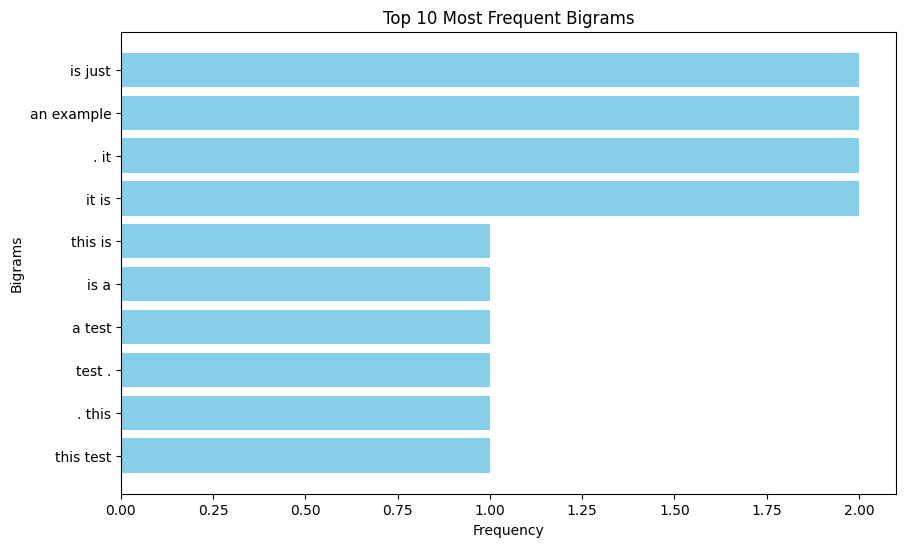

In [17]:
import matplotlib.pyplot as plt

#Sort the bigrams by count in descending order
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Take the top 10 most frequent bigrams
top_bigrams = sorted_bigrams[:10]

# Unpack bigrams and counts for plotting
bigrams, counts = zip(*top_bigrams)

# Convert bigrams from tuples to strings for better plotting
bigrams_str = [' '.join(bigram) for bigram in bigrams]

# Plotting the most frequent bigrams
plt.figure(figsize=(10,6))
plt.barh(bigrams_str, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Frequent Bigrams')
plt.gca().invert_yaxis()
plt.show()

# **Comparing POS Taggers: NLTK, STANZA, SPACY**

**Installing libraries**

In [ ]:

# !pip install stanza
# !pip install stanza -U


# !pip install spacy
# !pip install spacy -U


# conda install -c conda-forge spacy
# python -m spacy download en_core_web_sm

# !pip install termcolor

In [37]:
# Here are the imported libraries.
import nltk
import stanza
import spacy
# Used for coloring output. Make POS tag easier to see and compare.
from termcolor import colored

# Download the averaged_perceptron_tagger resource
nltk.download('averaged_perceptron_tagger')

# The inputted string.
string = "Conor’s dog’s toy was hidden under the man’s sofa in the woman’s house"

print("""------------ \\ NLTK \\ --------------------------------------------------""")

# Tokenizes the inputted string.
nltk_words = nltk.word_tokenize(string)

# Labels each word with POS tag.
nltk_pos = nltk.pos_tag(nltk_words)

#print(nltk_pos)
for token in nltk_pos:
  print(token[0], colored(token[1], 'blue'))


------------ \ NLTK \ --------------------------------------------------
Conor NNP
’ NNP
s VBD
dog JJ
’ NNP
s NN
toy NN
was VBD
hidden VBN
under IN
the DT
man NN
’ VBZ
s JJ
sofa NN
in IN
the DT
woman NN
’ NNP
s NN
house NN


In [36]:
print("""\n------------ \\ STANZA \\ --------------------------------------------------""")

# Downloads STANZA’s English Language model.
stanza.download('en')

# Initializes STANZA’s pipeline with all processors.
nlp = stanza.Pipeline('en')

# Can alternatively specify which processors to use via:
#nlp = stanza.Pipeline(lang='en', processors='pos')

#Applies selected processors, including POS tagging, to string.
stanza_pos = nlp(string)

print(stanza_pos)

print(stanza_pos.entities)


------------ \ STANZA \ --------------------------------------------------
[
  [
    {
      "id": [
        1,
        2
      ],
      "text": "Conor’s",
      "start_char": 0,
      "end_char": 7,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 1,
      "text": "Conor",
      "lemma": "Conor",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 5,
      "deprel": "nmod:poss",
      "start_char": 0,
      "end_char": 5
    },
    {
      "id": 2,
      "text": "’s",
      "lemma": "'s",
      "upos": "PART",
      "xpos": "POS",
      "head": 1,
      "deprel": "case",
      "start_char": 5,
      "end_char": 7
    },
    {
      "id": [
        3,
        4
      ],
      "text": "dog’s",
      "start_char": 8,
      "end_char": 13,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "dog",
      "lemma": "dog",
      "upos": "NOUN",
      "xpos": "NN",
      "fe

In [34]:
print("""\n------------ \\ SpaCy \\ --------------------------------------------------""")

# Loads English tokenizer, POS tagger, parser and NER
nlp = spacy.load("en_core_web_sm")
spacy_pos = nlp(string)
for token in spacy_pos:
  print(token, colored(token.pos_, 'blue'))


------------ \ SpaCy \ --------------------------------------------------
Conor PROPN
’s PART
dog NOUN
’s PART
toy NOUN
was AUX
hidden VERB
under ADP
the DET
man NOUN
’s PART
sofa NOUN
in ADP
the DET
woman NOUN
’s PART
house NOUN
